1.Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.Download data

In [2]:
sales_df=pd.read_csv("fact_sales2.csv")

3.Initial data check

In [3]:
print(sales_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25065 entries, 0 to 25064
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  25065 non-null  object 
 1   Customer ID       20649 non-null  float64
 2   Description       25065 non-null  object 
 3   Stock Code        25065 non-null  object 
 4   Invoice No        24404 non-null  float64
 5   Quantity          25065 non-null  int64  
 6   Sales             25065 non-null  float64
 7   Unit Price        25065 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB
None


In [4]:
print(sales_df.describe())

       Customer ID     Invoice No      Quantity         Sales    Unit Price
count  20649.00000   24404.000000  25065.000000  25065.000000  25065.000000
mean   15288.80217  559952.514793      2.981408     61.082257     28.771337
std     1692.08989   12755.865862     11.905880    289.275933     41.807294
min    12347.00000  536365.000000   -321.000000  -4911.300000      0.000000
25%    13884.00000  549568.000000      1.000000     20.280000     12.480000
50%    15152.00000  560223.500000      1.000000     29.700000     23.700000
75%    16762.00000  570871.000000      2.000000     59.400000     29.700000
max    18287.00000  581585.000000    717.000000  38970.000000   3897.000000


In [5]:
print (sales_df.isnull().sum())

Transaction Date       0
Customer ID         4416
Description            0
Stock Code             0
Invoice No           661
Quantity               0
Sales                  0
Unit Price             0
dtype: int64


In [6]:
print (sales_df.nunique())

Transaction Date    11408
Customer ID          3146
Description            21
Stock Code             20
Invoice No          11427
Quantity              108
Sales                 610
Unit Price            101
dtype: int64


In [7]:
print (sales_df.duplicated().sum())

0


In [8]:
sales_df.shape

(25065, 8)

4. Handle missing values

In [9]:
sales_df['Customer ID'].fillna('Unknown', inplace=True)

C:\Users\ElSakka Group\AppData\Local\Temp\ipykernel_13504\3308868139.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sales_df['Customer ID'].fillna('Unknown', inplace=True)


In [10]:
sales_df = sales_df.dropna(subset=['Invoice No'])

In [11]:
duplicates = sales_df[sales_df.duplicated(subset=['Invoice No'], keep=False)]

In [12]:
sales_df.duplicated(subset=['Invoice No']).sum()


12977

In [13]:
duplicate_rows = sales_df[sales_df.duplicated(subset=['Invoice No', 'Description', 'Quantity', 'Unit Price'], keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [Transaction Date, Customer ID, Description, Stock Code, Invoice No, Quantity, Sales, Unit Price]
Index: []


In [14]:
unique_products_per_invoice = sales_df.groupby('Invoice No')['Description'].nunique()

5. Remove outliers

In [15]:
print (sales_df.isnull().sum())

Transaction Date    0
Customer ID         0
Description         0
Stock Code          0
Invoice No          0
Quantity            0
Sales               0
Unit Price          0
dtype: int64


In [16]:
sales_df = sales_df[(sales_df['Quantity'] > 0) & (sales_df['Sales'] > 0) & (sales_df['Unit Price'] > 0)]

In [17]:
Q1 = sales_df["Sales"].quantile(0.25)
Q3 = sales_df["Sales"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
sales_df = sales_df[(sales_df["Sales"] >= lower_bound) & (sales_df["Sales"] <= upper_bound)]


6. Correct wrong data types


In [18]:
sales_df['Stock Code'] = sales_df['Stock Code'].astype(str)

In [19]:
sales_df['Customer ID'] = sales_df['Customer ID'].astype(str)

In [20]:
sales_df['Transaction Date'] = pd.to_datetime(sales_df['Transaction Date'])

In [21]:
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22018 entries, 0 to 25064
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Date  22018 non-null  datetime64[ns]
 1   Customer ID       22018 non-null  object        
 2   Description       22018 non-null  object        
 3   Stock Code        22018 non-null  object        
 4   Invoice No        22018 non-null  float64       
 5   Quantity          22018 non-null  int64         
 6   Sales             22018 non-null  float64       
 7   Unit Price        22018 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.5+ MB
None


 7. Clean text and standardize values

In [22]:
sales_df['Customer ID'] = sales_df['Customer ID'].str.strip()
sales_df['Description'] = sales_df['Description'].str.strip()
sales_df['Stock Code'] = sales_df['Stock Code'].str.strip()

In [23]:
sales_df=sales_df.drop_duplicates()

In [24]:
print (sales_df.duplicated().sum())         #There were no repetitions, but I wanted to write the code to clarify the steps in general.

0


In [25]:
sales_df = sales_df.groupby(["Invoice No", "Stock Code"], as_index=False).agg({
    "Quantity": "sum",
    "Sales": "sum",
    "Unit Price": "mean",
    "Customer ID": "first",
    "Transaction Date": "first",
    "Description": "first"
})        #Merge duplicate invoices for the same product in the same invoice

9. Save the cleaned data

In [26]:
sales_df.to_csv("fact_sales_cleaned.csv", index=False) 

In [27]:
sales_df

,Invoice No,Stock Code,Quantity,Sales,Unit Price,Customer ID,Transaction Date,Description
0,536365.0,85123A,1,15.30,15.30,17850.0,2020-12-01 08:26:00,Dog and Puppy Pads
1,536367.0,84879,6,60.84,10.14,13047.0,2020-12-01 08:34:00,Pet Odor Eliminator
2,536368.0,22960,1,25.50,25.50,13047.0,2020-12-01 08:34:00,Rechargeable Pet Nail Grinder
3,536373.0,85123A,1,15.30,15.30,17850.0,2020-12-01 09:02:00,Dog and Puppy Pads
4,536375.0,85123A,1,15.30,15.30,17850.0,2020-12-01 09:32:00,Dog and Puppy Pads
...,...,...,...,...,...,...,...,...
21948,581579.0,23084,4,42.96,10.74,17581.0,2021-12-09 12:19:00,Templation Soft Cat Treats
21949,581580.0,79321,1,34.50,34.50,12748.0,2021-12-09 12:20:00,ProBiotic Supplements for Dogs
21950,581583.0,20725,7,60.90,8.70,13777.0,2021-12-09 12:23:00,Pet Grooming Brush
21951,581585.0,23084,2,24.96,12.48,15804.0,2021-12-09 12:31:00,Templation Soft Cat Treats


Data Analysis

Customer analysis

In [28]:
#Distribution of customers by number of purchases
customer_purchases = sales_df.groupby("Customer ID")["Invoice No"].nunique().sort_values(ascending=False)
print(customer_purchases.describe())

count    3041.000000
mean        3.427491
std        16.212916
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       859.000000
Name: Invoice No, dtype: float64


C:\Users\ElSakka Group\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


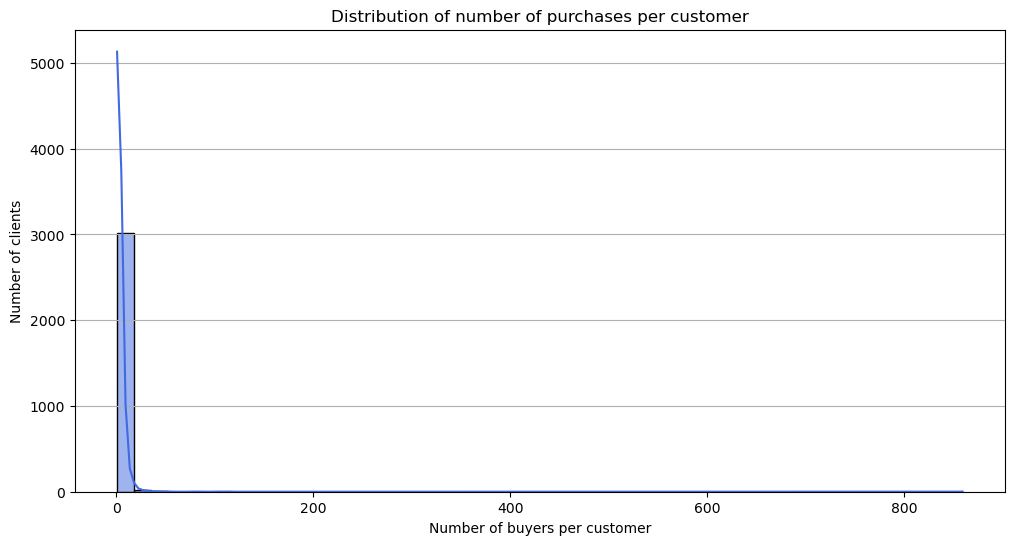

In [29]:

plt.figure(figsize=(12, 6))
sns.histplot(customer_purchases, bins=50, kde=True, color="royalblue")
plt.xlabel("Number of buyers per customer")
plt.ylabel("Number of clients")
plt.title("Distribution of number of purchases per customer")
plt.grid(axis="y")
plt.show()


Interpretation:
The analysis shows that most customers made only a few purchases (between 1 and 4), but there are some customers who made a very large number of purchases (up to 858). It is likely that this dataset includes customers who shop very frequently, while the majority of customers make purchases only occasionally or infrequently.

Recommendations:
Loyal Customers: It could be beneficial to focus on engaging the most loyal customers (those with high purchase counts) through loyalty programs or special offers to encourage them to continue purchasing.
Customer Behavior Analysis: Further analysis could help identify other factors affecting the number of purchases, such as marketing campaigns or seasonal promotions.
Low-frequency Buyers: For customers making fewer purchases, it may be useful to review marketing strategies aimed at engaging these customers more effectively and motivating them to interact more with the store.

In [30]:
#RFM Analysis
sales_df["Transaction Date"] = pd.to_datetime(sales_df["Transaction Date"])
latest_date = sales_df["Transaction Date"].max()
rfm = sales_df.groupby("Customer ID").agg({
    "Transaction Date": lambda x: (latest_date - x.max()).days,
    "Invoice No": "count",
    "Sales": "sum"
}).rename(columns={"Transaction Date": "Recency", "Invoice No": "Frequency", "Sales": "Monetary"})

print(rfm.describe())



           Recency    Frequency       Monetary
count  3041.000000  3041.000000    3041.000000
mean     96.805656     7.219007     264.070852
std     100.630588    68.438943    2929.508951
min       0.000000     1.000000       5.100000
25%      19.000000     1.000000      47.700000
50%      56.000000     3.000000     102.900000
75%     154.000000     7.000000     231.600000
max     373.000000  3732.000000  160227.600000


Interpretation:
Recency:Most customers purchased recently, but some haven't bought in a long time, indicating a need for customer retention efforts.
Frequency:Many customers make a few purchases, while a few make frequent purchases. Loyalty programs could engage high-frequency buyers.
Monetary:Most customers spend modest amounts, but a small group spends significantly more. Target high-spending customers with exclusive offers.

Recommendations:
Recency: Focus on re-engaging customers who haven’t bought recently.
Frequency: Encourage infrequent buyers to shop more often and reward loyal customers.
Monetary: Reward high spenders with personalized offers.
Segmentation: Use RFM scores to tailor marketing efforts to different customer segments.

C:\Users\ElSakka Group\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


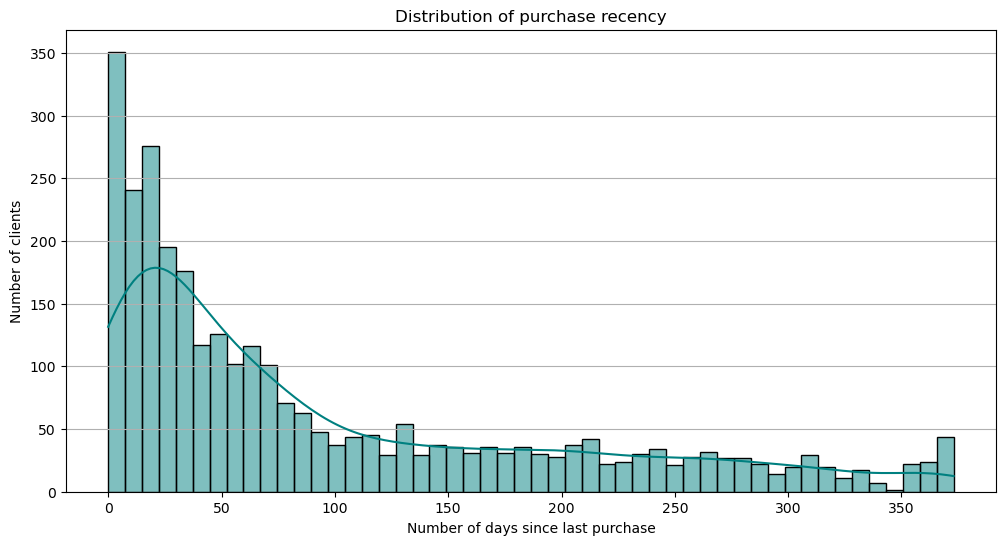

In [31]:
#Recency chart
plt.figure(figsize=(12, 6))
sns.histplot(rfm["Recency"], bins=50, kde=True, color="teal")
plt.xlabel("Number of days since last purchase")
plt.ylabel("Number of clients")
plt.title("Distribution of purchase recency")
plt.grid(axis="y")
plt.show()


In [32]:
#Top 10 Clients by Total Spending
top_customers = rfm.sort_values("Monetary", ascending=False).head(10)
print(top_customers)


             Recency  Frequency   Monetary
Customer ID                               
Unknown            0       3732  160227.60
14911.0            0        239    9430.86
17841.0            1        264    7431.72
13089.0            3        111    5771.94
14096.0            3        102    5442.18
17675.0            0         86    4782.48
15039.0            9        109    3643.20
13767.0            1         49    3264.12
12921.0            8         66    3178.86
12748.0            0        130    3077.88


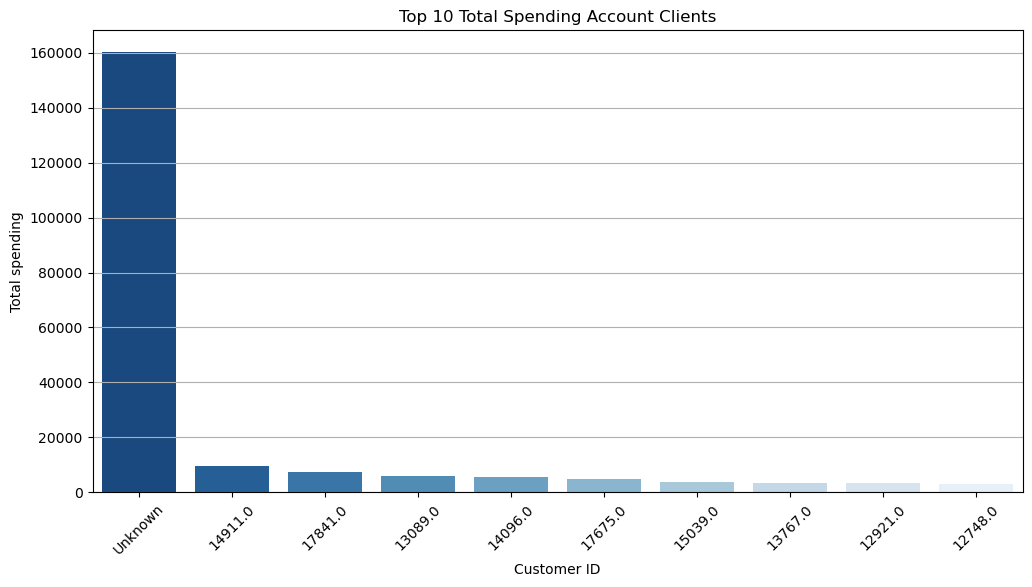

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index, y=top_customers["Monetary"], palette="Blues_r")
plt.xlabel("Customer ID")
plt.ylabel("Total spending")
plt.title("Top 10 Total Spending Account Clients")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


Key Observations:
The "unknown" customer is the highest spender, with a total of 142,517.64 units spent and 3554 purchases, indicating frequent, high-value transactions.
Customers with minimal recency (e.g., 0 or 1 days) seem to have high total spending, despite lower frequency (e.g., customer 14911.0 with 237 purchases).
Frequent purchasers, like customers 14911.0 and 17841.0, still have high spending, showing that recency doesn't always correlate with high monetary value.
Recommendations:
Focus on engaging high-spending customers, especially "unknown", who contribute significantly to revenue.
Consider offering personalized offers or VIP programs for frequent, high-spending customers to enhance loyalty.
Investigate customers with low recency and high spending to understand their purchasing behavior.
#The "unknown" customer They are the people who have a message value in the customer ID.
                                                     

In [34]:
#Average Spend Per Customer
avg_spending_per_customer = sales_df.groupby("Customer ID")["Sales"].mean()


C:\Users\ElSakka Group\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ElSakka Group\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


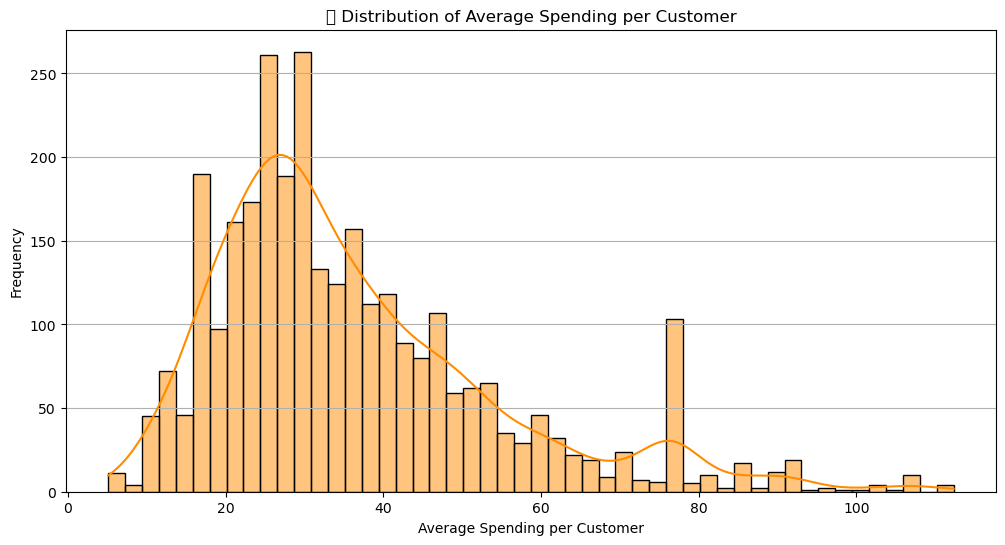

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(avg_spending_per_customer, bins=50, kde=True, color="darkorange")
plt.xlabel("Average Spending per Customer")
plt.ylabel("Frequency")
plt.title("🔹 Distribution of Average Spending per Customer")
plt.grid(axis="y")
plt.show()

ProductAnalysis

In [36]:
# the highest revenue generating products
top_selling_products = sales_df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print(top_selling_products)


Description
Sheba Perfect Portions Pat Wet Cat Food                            4923
Pet Odor Eliminator                                                4181
Dog and Puppy Pads                                                 4004
Earth Rated Dog Poop Bags                                          3695
Pet Grooming Brush                                                 2770
Pet Hair Remover                                                   2294
Litter Slide Multi-Cat Scented Clumping Clay Cat Litter            2043
Templation Soft Cat Treats                                         2001
Milk-Bone MaroSnacks Dog Treats with Real Bone                     1916
Memory Foam Pet Beds for Small, Medium, and Large Dogs and Cats    1853
Name: Quantity, dtype: int64


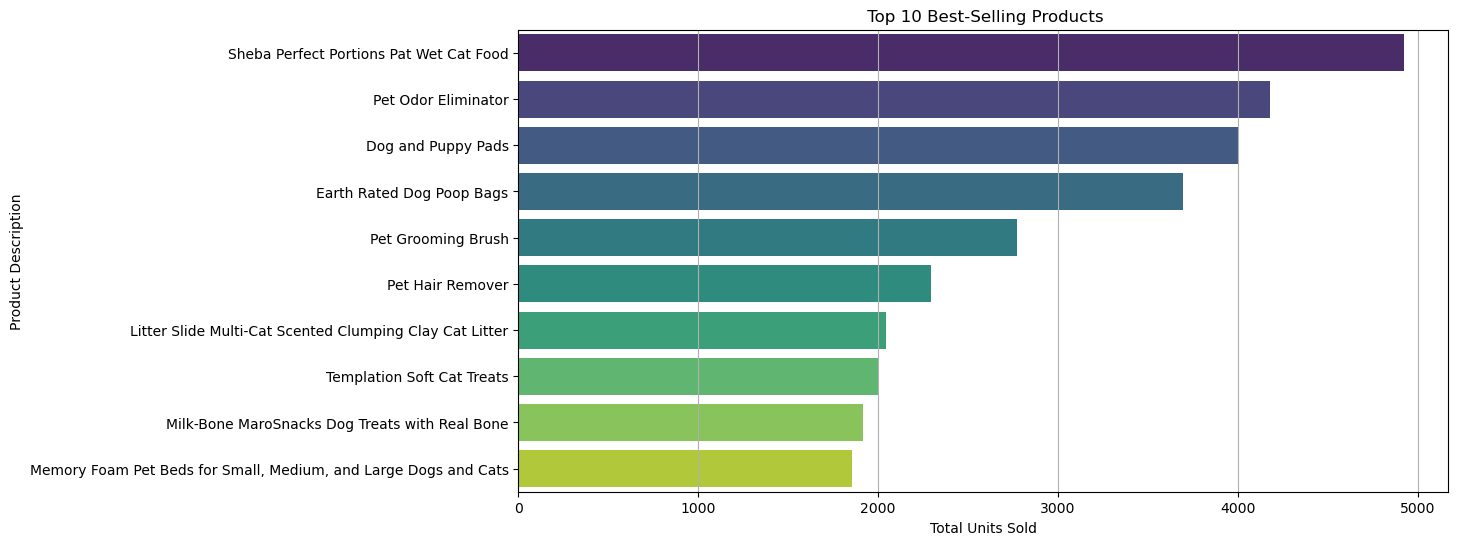

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products.values, y=top_selling_products.index, palette="viridis")
plt.xlabel("Total Units Sold")
plt.ylabel("Product Description")
plt.title(" Top 10 Best-Selling Products")
plt.grid(axis="x")
plt.show()


Key Observations:
Sheba Perfect Portions Pat Wet Cat Food leads with the highest quantity sold (4912), making it the most popular product.
Products related to pet care and cleaning (e.g., Pet Odor Eliminator and Dog and Puppy Pads) also have high sales, indicating demand for these essentials.
Pet grooming and treats products (e.g., Pet Grooming Brush and Milk-Bone MaroSnacks Dog Treats) have relatively high sales, showing that consumers invest in both pet health and enjoyment.


Recommendations:
Stock and promote the highest-selling products to ensure availability and continuous sales growth.
Expand marketing efforts for pet care essentials, such as odor eliminators and grooming products, which generate steady sales.
Explore opportunities to bundle popular products (e.g., grooming brush and pet hair remover) to drive sales.

In [38]:
sales_df.to_csv("sales_df.csv", index=False)

In [39]:
sales_df.to_excel('sales_df.xlsx', index=False)

In [40]:
print(sales_df.head())

   Invoice No Stock Code  Quantity  Sales  Unit Price Customer ID  \
0    536365.0     85123A         1  15.30       15.30     17850.0   
1    536367.0      84879         6  60.84       10.14     13047.0   
2    536368.0      22960         1  25.50       25.50     13047.0   
3    536373.0     85123A         1  15.30       15.30     17850.0   
4    536375.0     85123A         1  15.30       15.30     17850.0   

     Transaction Date                    Description  
0 2020-12-01 08:26:00             Dog and Puppy Pads  
1 2020-12-01 08:34:00            Pet Odor Eliminator  
2 2020-12-01 08:34:00  Rechargeable Pet Nail Grinder  
3 2020-12-01 09:02:00             Dog and Puppy Pads  
4 2020-12-01 09:32:00             Dog and Puppy Pads  


In [41]:
sales_df.to_csv('sales_df analysis.csv', index=False)

In [42]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [44]:
sales_df.to_excel('fact sales clean.xlsx', index=False, engine='openpyxl')
